In [2]:
from Utils.Solver import *

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


     pcost       dcost       gap    pres   dres
 0:  1.4927e-04 -1.0014e+00  1e+00  0e+00  3e+00
 1:  1.4794e-04 -1.1377e-02  1e-02  7e-17  3e-02
 2:  7.2103e-05 -1.0262e-03  1e-03  8e-17  3e-03
 3: -2.0836e-06 -6.2418e-05  6e-05  8e-17  5e-19
 4: -3.5037e-06 -4.6482e-06  1e-06  2e-16  5e-19
 5: -3.5054e-06 -3.5169e-06  1e-08  4e-17  2e-19
Optimal solution found.
Optimized Portfolio Weights:
{'AAPL': np.float64(0.2011869899266379), 'MSFT': np.float64(0.11476575943483586), 'TSLA': np.float64(0.1627190114836506), 'AMZN': np.float64(0.18233142253604998), 'GOOG': np.float64(0.33899681661882575)}
Expected Annual Portfolio Return: 0.37
Expected Annual Portfolio Volatility: 0.40
[0.20118699 0.11476576 0.16271901 0.18233142 0.33899682]


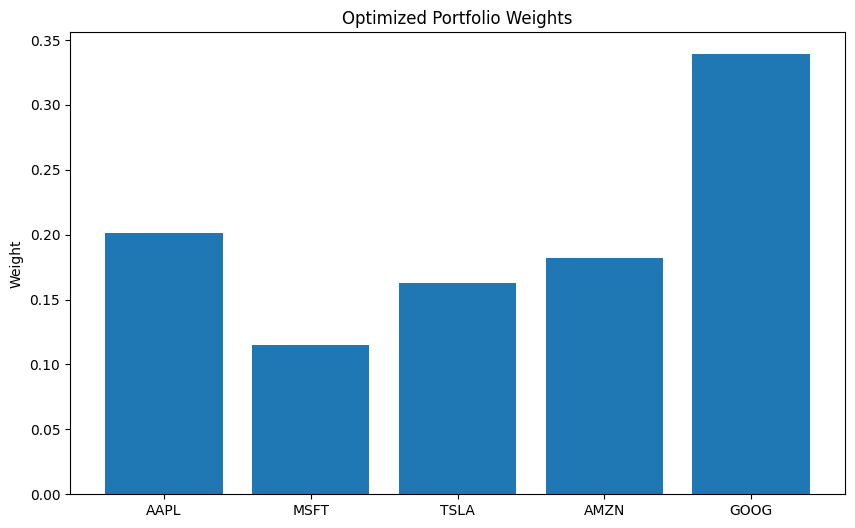

In [3]:
# Let's assume we are interested in the following stocks: AAPL, MSFT, TSLA, AMZN, GOOG
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']
# Signal scores for AAPL, MSFT, TSLA, AMZN, GOOG
signal_scores = np.array([1.0, 1.0, 1.0, 1.0, 1.0])  

# Step 1: Download historical stock data
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')

portfolio_solver = Portfolio_Solver(0.01)
portfolio_weights = portfolio_solver.SolvePortfolio(tickers, data, signal_scores)
print(portfolio_weights)
portfolio_solver.ShowPortfolioWeights(tickers=tickers, portfolio_weights=portfolio_weights)

In [22]:
import yfinance as yf
import talib as ta
import pandas as pd

# Fetch stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

print(data['Close'])
print(data['Close'].to_numpy().shape)
print(data['Close'].to_numpy().flatten())
print(data['Close'].to_numpy().flatten().shape)


[*********************100%***********************]  1 of 1 completed

Ticker            AAPL
Date                  
2020-01-02   72.716072
2020-01-03   72.009117
2020-01-06   72.582901
2020-01-07   72.241547
2020-01-08   73.403648
...                ...
2022-12-23  130.344498
2022-12-27  128.535538
2022-12-28  124.591377
2022-12-29  128.120346
2022-12-30  128.436676

[756 rows x 1 columns]
(756, 1)
[ 72.71607208  72.00911713  72.582901    72.24154663  73.40364838
  74.96279907  75.13227844  76.73742676  75.70121765  75.37680817
  76.32099152  77.16595459  76.64299774  76.91658783  77.28700256
  77.06427002  74.79817963  76.91416168  78.52414703  78.41033936
  74.93373108  74.72795105  77.19499207  77.82447815  78.73479462
  77.66455841  78.03343201  77.5626297   79.40457153  78.83912659
  78.85855103  77.41459656  78.5357666   77.73009491  75.97064972
  72.36203003  69.91096497  71.01999664  66.37757111  66.33872986
  72.51490021  70.21191406  73.46865082  71.08553314  70.14151764
  64.59387207  69.24602509  66.84108734  60.24021149  67.45748901
  58.779

In [24]:
import yfinance as yf
import talib as ta
import pandas as pd

# Fetch stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
flat_close = data['Close'].to_numpy().flatten()
# Calculate the RSI
data['RSI'] = ta.RSI(flat_close, timeperiod=14)

# Calculate the MACD
data['MACD'], data['MACD_signal'], data['MACD_hist'] = ta.MACD(flat_close, fastperiod=12, slowperiod=26, signalperiod=9)

# Check the results
print(data[['Close', 'RSI', 'MACD', 'MACD_signal']].tail())

[*********************100%***********************]  1 of 1 completed

Price            Close        RSI      MACD MACD_signal
Ticker            AAPL                                 
Date                                                   
2022-12-23  130.344498  35.694669 -3.612790   -2.518822
2022-12-27  128.535538  33.675361 -3.876382   -2.790334
2022-12-28  124.591377  29.726649 -4.353358   -3.102939
2022-12-29  128.120346  36.860474 -4.395933   -3.361537
2022-12-30  128.436676  37.473212 -4.353960   -3.560022
